## Bic Vu's Capstone Project
#### ML Guild - Apprentice Cohort 11
#### Notebook 3
2023-06-10

In [1]:
import pandas as pd
import ydata_profiling as pf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
# from sklearn.preprocessing import OneHotEncoder

pd.set_option('display.max_columns', None)
pd.set_option("display.precision", 12)

from datetime import date
today = date.today()

In [2]:
df = pd.read_parquet("data/output/all_features_aggZip_2023-06-10")
df = df.drop("zip", axis=1)
print(df.shape)
df.head()

(14256, 17)


,census_tract,approval,loan_amount,property_value,income,tract_minority_population_percent,income_level,dti_level,derived_race,num_below_p50,ec_zip,nbhd_ec_zip,exposure_grp_mem_zip,nbhd_exposure_zip,clustering_zip,volunteering_rate_zip,civic_organizations_zip
0,25013813204,0.862095897815,201277.371762718569,302607.841576858191,91.437785742412,11.288333333333,middle,50,White,995.787467956543,0.88156998,1.51095000,1.12959,1.50590000,0.105720000,0.056499999,0.0108000000
1,25011040600,0.892316453372,285961.037087271456,438074.101620255213,162.275709825145,20.506250000000,upper,30,White,1312.117076873779,1.18348000,0.97759998,1.36818,1.20281990,0.103400000,0.149510000,0.0368800010
2,25027704200,0.897078689632,243595.350669818785,360452.268377800297,101.489980862321,4.450000000000,middle,50,White,381.519744873047,1.15543000,1.46491000,1.31876,1.46396990,0.105540000,0.158620000,0.0216300000
3,25015820202,0.861290526849,261565.597702565807,391370.493784057617,115.430058668091,8.760000000000,upper,30,White,915.396667480469,1.19240000,1.17985000,1.30741,1.23108990,0.103910000,0.130530000,0.0168999990
4,25013800400,0.809416265856,175619.893285605533,252751.344676762470,75.982170568134,30.257777777778,moderate,42,White,2616.550354003906,0.69744003,0.53930002,0.87842,0.67602003,0.086479999,0.061910000,0.0096899997


In [3]:
df.columns

Index(['census_tract', 'approval', 'loan_amount', 'property_value', 'income',
       'tract_minority_population_percent', 'income_level', 'dti_level',
       'derived_race', 'num_below_p50', 'ec_zip', 'nbhd_ec_zip',
       'exposure_grp_mem_zip', 'nbhd_exposure_zip', 'clustering_zip',
       'volunteering_rate_zip', 'civic_organizations_zip'],
      dtype='object')

In [4]:
# Separate out numeric and categorical data columsn and define type
num_cols = ['approval', 'loan_amount', 'property_value', 'income',
       'tract_minority_population_percent', 'num_below_p50', 'ec_zip', 'nbhd_ec_zip',
       'exposure_grp_mem_zip', 'nbhd_exposure_zip', 'clustering_zip',
       'volunteering_rate_zip', 'civic_organizations_zip']
str_cols = ['census_tract', 'income_level', 'dti_level', 'derived_race']

df[num_cols] = df[num_cols].astype(float)
df[str_cols] = df[str_cols].astype(str)
df.dtypes

census_tract                          object
approval                             float64
loan_amount                          float64
property_value                       float64
income                               float64
tract_minority_population_percent    float64
income_level                          object
dti_level                             object
derived_race                          object
num_below_p50                        float64
ec_zip                               float64
nbhd_ec_zip                          float64
exposure_grp_mem_zip                 float64
nbhd_exposure_zip                    float64
clustering_zip                       float64
volunteering_rate_zip                float64
civic_organizations_zip              float64
dtype: object

### EDA

In [5]:
'''Takes a long time to run'''

# # Visualize correlation as heatmap
# fig, ax = plt.subplots(figsize=(20,10)) 
# sns.set_palette("Set2")

# ax = sns.heatmap(df.corr(), annot=True)
# plt.show()
# ax.figure.savefig("charts/charts_final/corr-"+str(today)+".png")

'Takes a long time to run'

In [6]:
'''Takes a long time to run'''
# scatter_matrix = sns.pairplot(df)
# scatter_matrix.savefig("charts/final_scatter_matrix_"+str(today)+".png")

'Takes a long time to run'

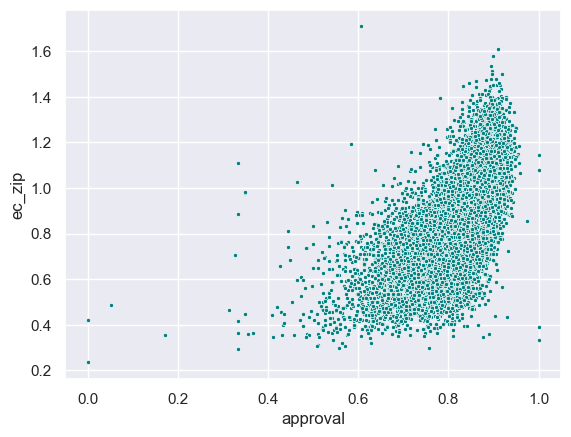

In [7]:
# Individual scatter plots
sns.set_theme()
sns.set_palette("Set2")
target = "approval"
feature = "ec_zip"
scatter = sns.scatterplot(data=df, x=target, y=feature, marker=".", color = "teal")
# scatter.figure.savefig("charts/scatter-"+target+"_"+feature+"_"+str(today)+".png")

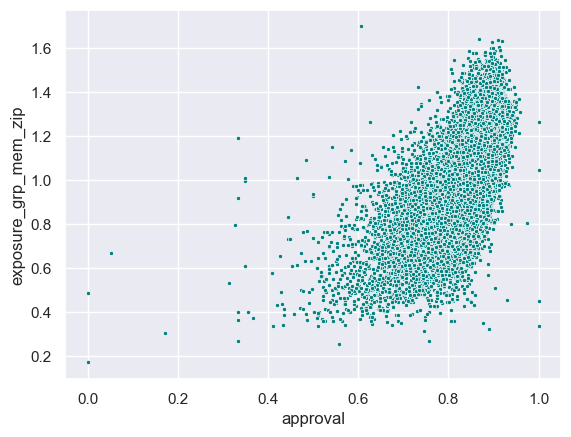

In [53]:
target = "approval"
feature = "exposure_grp_mem_zip"
scatter = sns.scatterplot(data=df, x=target, y=feature, marker=".", color = "teal")
# scatter.figure.savefig("charts/scatter-"+target+"_"+feature+"_"+str(today)+".png")

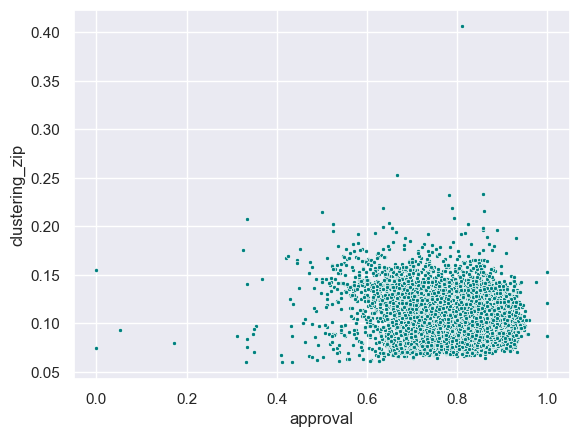

In [14]:
target = "approval"
feature = "clustering_zip"
scatter = sns.scatterplot(data=df, x=target, y=feature, marker=".", color = "teal")
# scatter.figure.savefig("charts/scatter-"+target+"_"+feature+"_"+str(today)+".png")

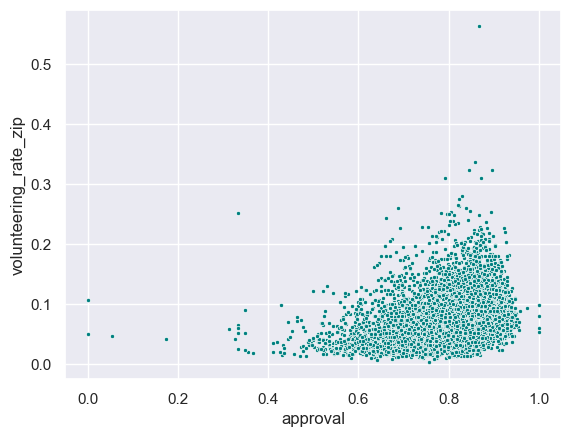

In [15]:
target = "approval"
feature = "volunteering_rate_zip"
scatter = sns.scatterplot(data=df, x=target, y=feature, marker=".", color = "teal")
# scatter.figure.savefig("charts/scatter-"+target+"_"+feature+"_"+str(today)+".png")

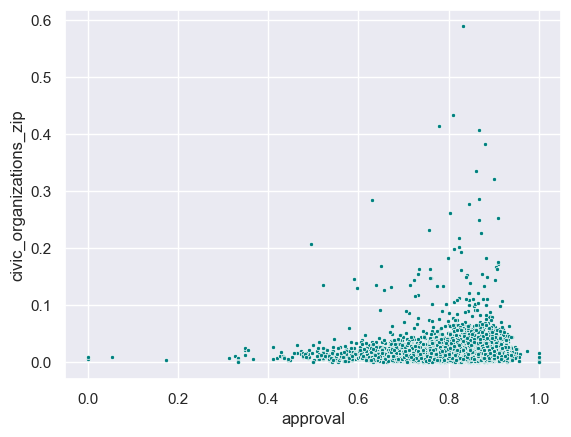

In [17]:
target = "approval"
feature = "civic_organizations_zip"
scatter = sns.scatterplot(data=df, x=target, y=feature, marker=".", color = "teal")
# scatter.figure.savefig("charts/scatter-"+target+"_"+feature+"_"+str(today)+".png")

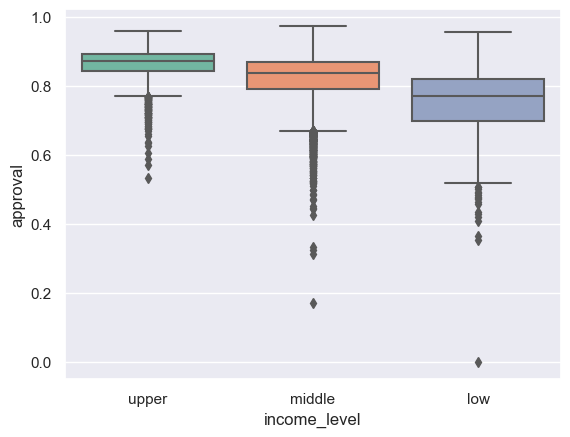

In [13]:
# Boxplot comparing categorical income level and approval rate
sort_order = ["upper", "middle", "low"]
boxplot = sns.boxplot(data=df, order = sort_order, x="income_level", y="approval")
boxplot.figure.savefig("charts/boxplot_incomelevel"+str(today)+".png")

### Prep categorical data for model - Encoding

In [18]:
df = pd.get_dummies(df, columns = ["income_level","dti_level", "derived_race"], prefix=["inc_", "dti_", "race"])
df.head()

,census_tract,approval,loan_amount,property_value,income,tract_minority_population_percent,num_below_p50,ec_zip,nbhd_ec_zip,exposure_grp_mem_zip,nbhd_exposure_zip,clustering_zip,volunteering_rate_zip,civic_organizations_zip,inc__low,inc__middle,inc__moderate,inc__nan,inc__upper,dti__100,dti__20,dti__30,dti__36,dti__42,dti__50,dti__60,race_American Indian or Alaska Native,race_Asian,race_Black or African American,race_Joint,race_Native Hawaiian or Other Pacific Islander,race_White
0,25013813204,0.862095897815,201277.371762718569,302607.841576858191,91.437785742412,11.288333333333,995.787467956543,0.88156998,1.51095000,1.12959,1.50590000,0.105720000,0.056499999,0.0108000000,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,25011040600,0.892316453372,285961.037087271456,438074.101620255213,162.275709825145,20.506250000000,1312.117076873779,1.18348000,0.97759998,1.36818,1.20281990,0.103400000,0.149510000,0.0368800010,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,25027704200,0.897078689632,243595.350669818785,360452.268377800297,101.489980862321,4.450000000000,381.519744873047,1.15543000,1.46491000,1.31876,1.46396990,0.105540000,0.158620000,0.0216300000,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,25015820202,0.861290526849,261565.597702565807,391370.493784057617,115.430058668091,8.760000000000,915.396667480469,1.19240000,1.17985000,1.30741,1.23108990,0.103910000,0.130530000,0.0168999990,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
4,25013800400,0.809416265856,175619.893285605533,252751.344676762470,75.982170568134,30.257777777778,2616.550354003906,0.69744003,0.53930002,0.87842,0.67602003,0.086479999,0.061910000,0.0096899997,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


### XGBoost
<p>https://machinelearningmastery.com/xgboost-for-regression/

In [19]:
# check xgboost version
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

print(xgb.__version__)

1.7.4


In [28]:
# Define features
X = df.drop(["approval","census_tract"], axis=1)

# Define target
y = df[["approval"]]

In [29]:
print(X.shape)
X.tail()

(14256, 30)


,loan_amount,property_value,income,tract_minority_population_percent,num_below_p50,ec_zip,nbhd_ec_zip,exposure_grp_mem_zip,nbhd_exposure_zip,clustering_zip,volunteering_rate_zip,civic_organizations_zip,inc__low,inc__middle,inc__moderate,inc__nan,inc__upper,dti__100,dti__20,dti__30,dti__36,dti__42,dti__50,dti__60,race_American Indian or Alaska Native,race_Asian,race_Black or African American,race_Joint,race_Native Hawaiian or Other Pacific Islander,race_White
14251,340283.208020050137,469288.220551378443,120.322556390977,37.300,790.157897949219,1.14198990,1.07357000,1.15966000,1.12967000,0.11632,0.139090000,0.035030000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
14252,306084.985190248350,398366.598313966766,113.306983367510,33.715,1192.299808979034,0.99517000,0.88014001,1.01237000,0.94761997,0.13473,0.118830000,0.029990001,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
14253,279285.714285714261,379642.857142857159,102.464285714286,38.800,365.768661499023,0.87976998,0.74554998,0.88303000,0.81680000,0.15561,0.084040001,0.032150000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
14254,215000.000000000000,305000.000000000000,90.666666666667,91.930,311.014251708984,0.87888002,0.81081003,0.84147000,0.80694002,0.25274,0.142910000,0.011250000,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
14255,243400.000000000000,317400.000000000000,81.320000000000,31.500,313.282989501953,1.06344000,0.88863999,0.97964001,0.88925999,0.16558,0.107000000,0.042479999,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [30]:
print(y.shape)
y.tail()

(14256, 1)


,approval
14251,0.855764411028
14252,0.823319662793
14253,0.607142857143
14254,0.666666666667
14255,0.840000000000


In [31]:
# Set random seed
seed = random.seed(42)
test_size = 0.3 # 70% will go to train

# split data into train and temporary set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=test_size, random_state=seed)

In [32]:
# split temporary data into test and validation sets
# Final result should be 70% train, 15% test, and 15% validation
test_size = 0.5
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=test_size, random_state=seed)

In [33]:
X_train.dtypes

loan_amount                                       float64
property_value                                    float64
income                                            float64
tract_minority_population_percent                 float64
num_below_p50                                     float64
ec_zip                                            float64
nbhd_ec_zip                                       float64
exposure_grp_mem_zip                              float64
nbhd_exposure_zip                                 float64
clustering_zip                                    float64
volunteering_rate_zip                             float64
civic_organizations_zip                           float64
inc__low                                            uint8
inc__middle                                         uint8
inc__moderate                                       uint8
inc__nan                                            uint8
inc__upper                                          uint8
dti__100      

In [34]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(9979, 30)
(2139, 30)
(2138, 30)


In [35]:
# https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBRFRegressor

model = XGBRegressor(
    n_estimators=300,
    max_depth = 5,
    random_state = seed,
    early_stopping_rounds=10
)

model = model.fit(X_train, y_train, eval_set=[(X_val, y_val)])

[0]	validation_0-rmse:0.23590
[1]	validation_0-rmse:0.16956
[2]	validation_0-rmse:0.12459
[3]	validation_0-rmse:0.09486
[4]	validation_0-rmse:0.07578
[5]	validation_0-rmse:0.06397
[6]	validation_0-rmse:0.05704
[7]	validation_0-rmse:0.05332
[8]	validation_0-rmse:0.05112
[9]	validation_0-rmse:0.05001
[10]	validation_0-rmse:0.04938
[11]	validation_0-rmse:0.04897
[12]	validation_0-rmse:0.04876
[13]	validation_0-rmse:0.04854
[14]	validation_0-rmse:0.04836
[15]	validation_0-rmse:0.04825
[16]	validation_0-rmse:0.04829
[17]	validation_0-rmse:0.04814
[18]	validation_0-rmse:0.04811
[19]	validation_0-rmse:0.04805
[20]	validation_0-rmse:0.04800
[21]	validation_0-rmse:0.04795
[22]	validation_0-rmse:0.04798
[23]	validation_0-rmse:0.04795
[24]	validation_0-rmse:0.04789
[25]	validation_0-rmse:0.04778
[26]	validation_0-rmse:0.04775
[27]	validation_0-rmse:0.04768
[28]	validation_0-rmse:0.04765
[29]	validation_0-rmse:0.04765
[30]	validation_0-rmse:0.04761
[31]	validation_0-rmse:0.04761
[32]	validation_0-

### Create predictions and compare with actuals

In [36]:
predictions = model.predict(X_test)

In [75]:
actual_pred = y_test.reset_index(drop=True)
actual_pred["predictions"] = predictions
actual_pred["residual"] = abs(actual_pred["approval"]-actual_pred["predictions"])
actual_pred.to_csv("data/output/actual_prediction_XGBoost"+str(today)+".csv")
actual_pred

,approval,predictions,residual
0,0.890642058394,0.868522346020,0.022119712374
1,0.717925735047,0.716644644737,0.001281090309
2,0.752515058700,0.730330646038,0.022184412662
3,0.847406895842,0.883598268032,0.036191372190
4,0.670585862550,0.794438898563,0.123853036013
...,...,...,...
2133,0.885766487783,0.876210689545,0.009555798239
2134,0.797924963968,0.861427485943,0.063502521975
2135,0.701873836482,0.788093864918,0.086220028436
2136,0.811011161086,0.835848927498,0.024837766412


In [47]:
top = actual_pred[:5]
bottom = actual_pred[-5:]
X_test_tb = pd.concat([top, bottom])
X_test_tb

,approval,predictions,residual
0,0.890642058394,0.868522346020,0.022119712374
1,0.717925735047,0.716644644737,0.001281090309
2,0.752515058700,0.730330646038,0.022184412662
3,0.847406895842,0.883598268032,0.036191372190
4,0.670585862550,0.794438898563,0.123853036013
2133,0.885766487783,0.876210689545,0.009555798239
2134,0.797924963968,0.861427485943,0.063502521975
2135,0.701873836482,0.788093864918,0.086220028436
2136,0.811011161086,0.835848927498,0.024837766412
2137,0.919473624266,0.898656010628,0.020817613638


In [48]:
X_test_tb.index

Int64Index([0, 1, 2, 3, 4, 2133, 2134, 2135, 2136, 2137], dtype='int64')

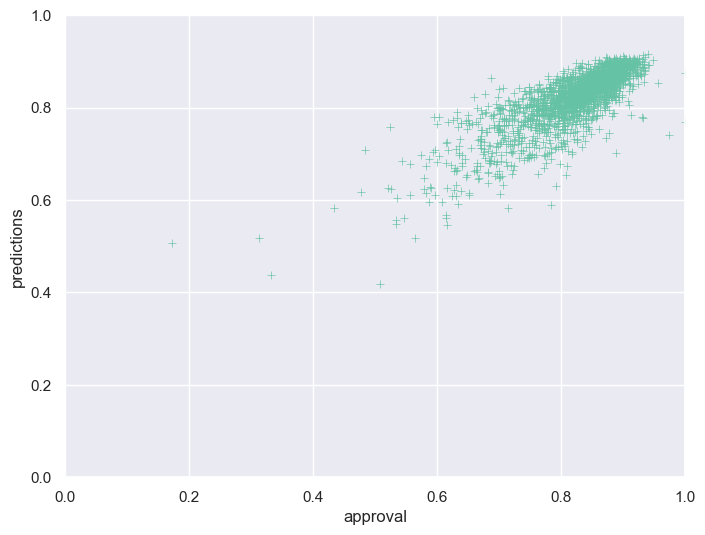

In [72]:
# scatter plot. x = true value, y = predictions
from datetime import date
today = date.today()

fig, ax = plt.subplots(figsize=(8, 6))
plt.xlim(0,1)
plt.ylim(0,1)

sns.set_theme()
sns.set_palette("Set2")

actuals = actual_pred["approval"]
predictions = actual_pred["predictions"]
scatter = sns.scatterplot(data=actual_pred, x=actuals, y=predictions, marker="+")
# scatter.figure.savefig("charts/charts_final/scatter_actuals-predictions-XGBoost_"+str(today)+".png")

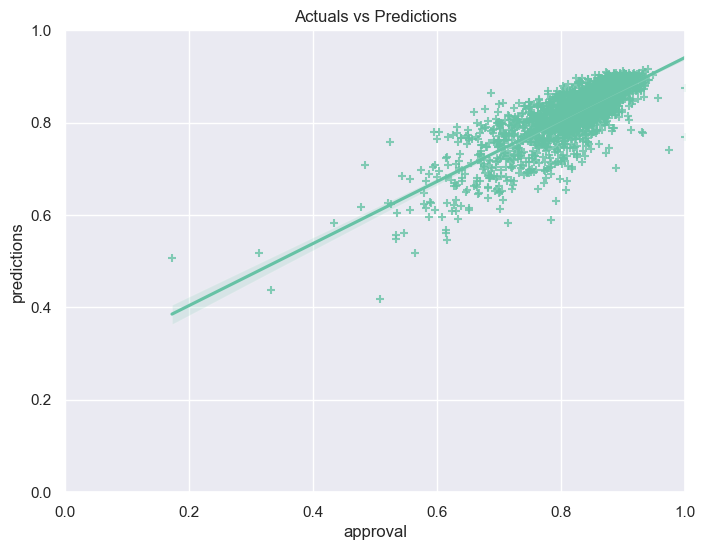

In [51]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.xlim(0,1)
plt.ylim(0,1)

sns.set_theme()
sns.set_palette("Set2")

# sns.title("Actuals vs Predictions")
actuals = actual_pred["approval"]
predictions = actual_pred["predictions"]
reg_scatter = sns.regplot(data = actual_pred, x="approval", y="predictions", marker="+")
reg_scatter.set(title='Actuals vs Predictions')
reg_scatter.figure.savefig("charts/charts_final/reg_actuals-predictions-XGBoost_"+str(today)+".png")

### RMSE

In [52]:
from sklearn.metrics import mean_squared_error
actuals = actual_pred["approval"]
predictions = actual_pred["predictions"]
mse = mean_squared_error(actuals, predictions)
print("MSE: %f" % (mse))

MSE: 0.001973


In [70]:
rmse = np.sqrt(mean_squared_error(actuals, predictions))
print("RMSE: %f" % (rmse))

RMSE: 0.044423


### Shap

In [54]:
# SHAP value to explain model
# plot beeswarm of features
# plot force plot for 5 best (smallest diff between prediction and actual) and 5 worst predictions (largest diff)

import shap
shap.initjs()
# shap.image_plot(shap_values, pixel_values=None, labels=None, width=20, aspect=0.2, hspace=0.2, labelpad=None, show=True)

In [56]:
# MUST HAVE SAME FEATURES
# Explain the model's prediction using SHAP
# Explainer use X test for waterfall. Train data for feature importance.

# Error for X_test in explainer and test in values:
# ExplainerError: Additivity check failed in TreeExplainer!

explainer = shap.Explainer(model, X_train) # to get feature importance, and use to explain test sample
test_shap_values = explainer(X_test) # use explainer to interpret test

In [57]:
print(X_test_tb.index)
top_index = X_test_tb.index[0:5]
print(top_index)
bottom_index = X_test_tb.index[5:10]
bottom_index

Int64Index([0, 1, 2, 3, 4, 2133, 2134, 2135, 2136, 2137], dtype='int64')
Int64Index([0, 1, 2, 3, 4], dtype='int64')


Int64Index([2133, 2134, 2135, 2136, 2137], dtype='int64')

### Visualize best predictions

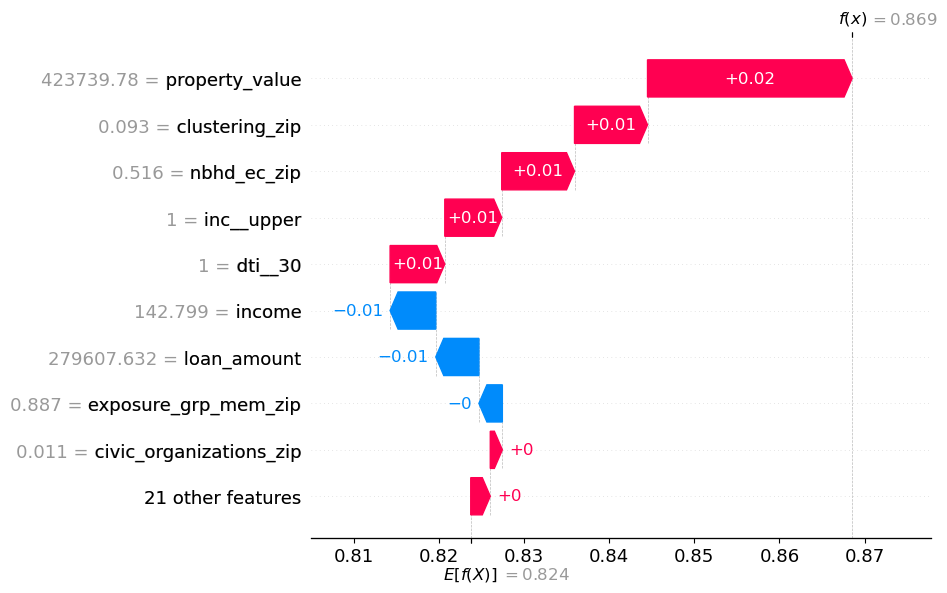

In [58]:
# Reset matplotlib styles
plt.rcdefaults()
### BEST PREDICTION
# Visualize the first predictions's explaination

# for i in range(len(top_index)):
#     print(top_index[i])
#     shap.plots.waterfall(test_shap_values[top_index[i]])
#     shap.plots.force(test_shap_values[top_index[i]])
    
shap.plots.waterfall(test_shap_values[top_index[0]])
shap.plots.force(test_shap_values[top_index[0]])

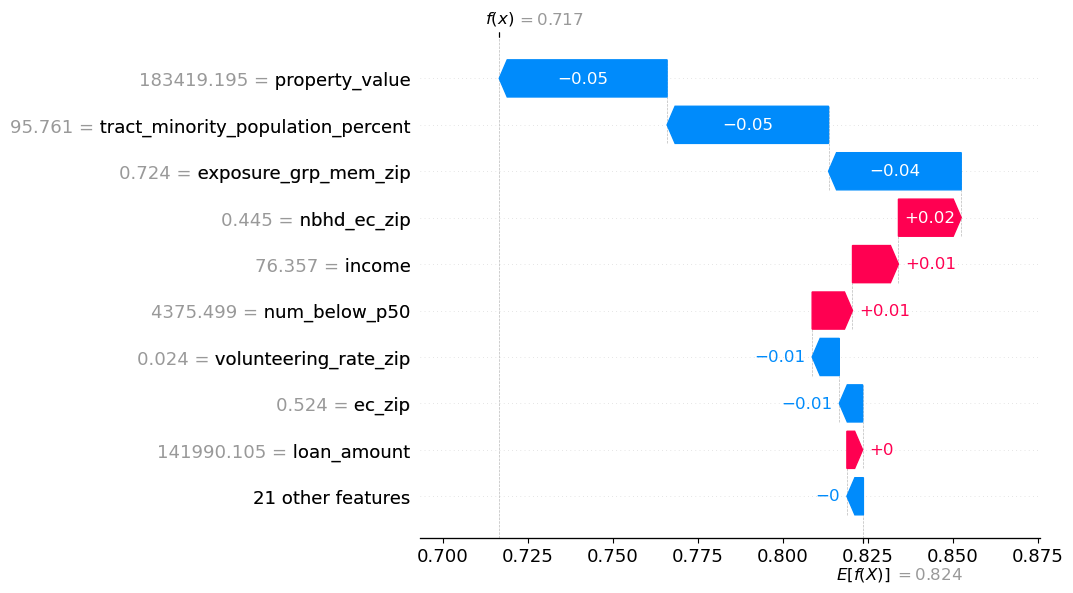

In [59]:
shap.plots.waterfall(test_shap_values[top_index[1]])
shap.plots.force(test_shap_values[top_index[1]])

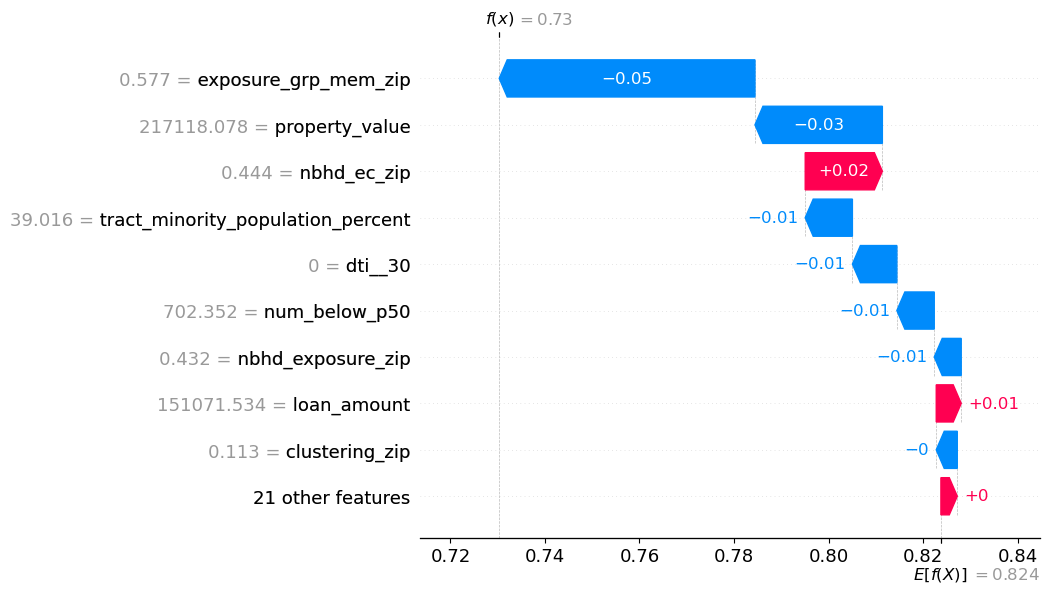

In [60]:
shap.plots.waterfall(test_shap_values[top_index[2]])
shap.plots.force(test_shap_values[top_index[2]])

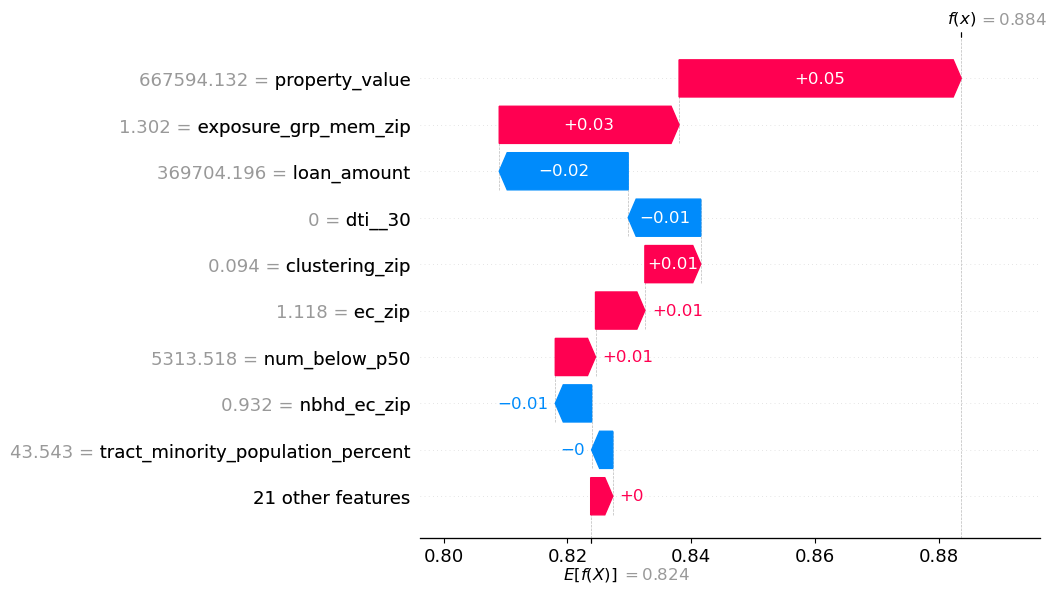

In [61]:
shap.plots.waterfall(test_shap_values[top_index[3]])
shap.plots.force(test_shap_values[top_index[3]])

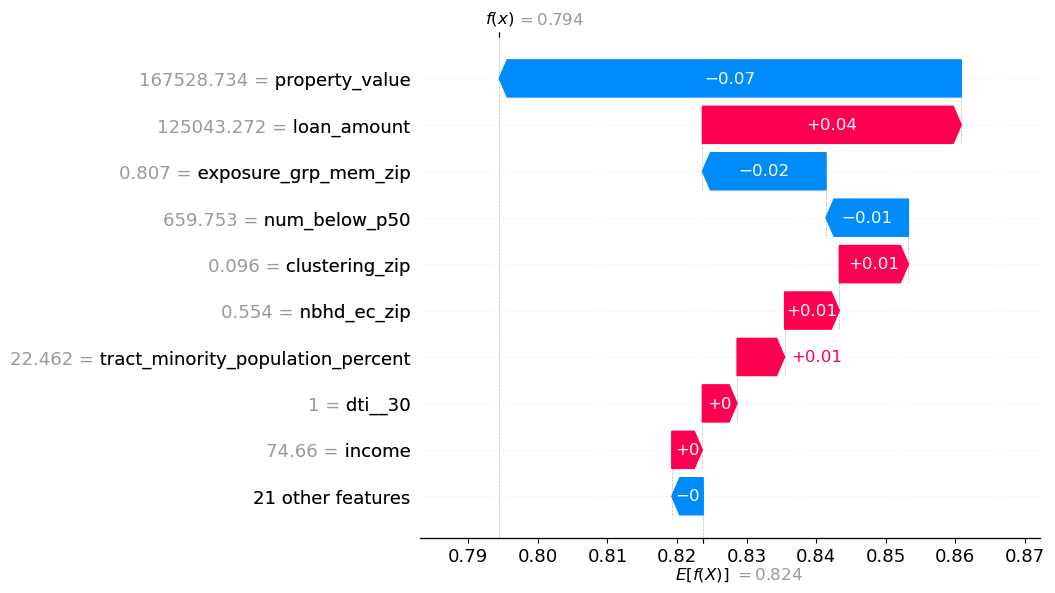

In [62]:
shap.plots.waterfall(test_shap_values[top_index[4]])
shap.plots.force(test_shap_values[top_index[4]])

### Visualize worst predictions

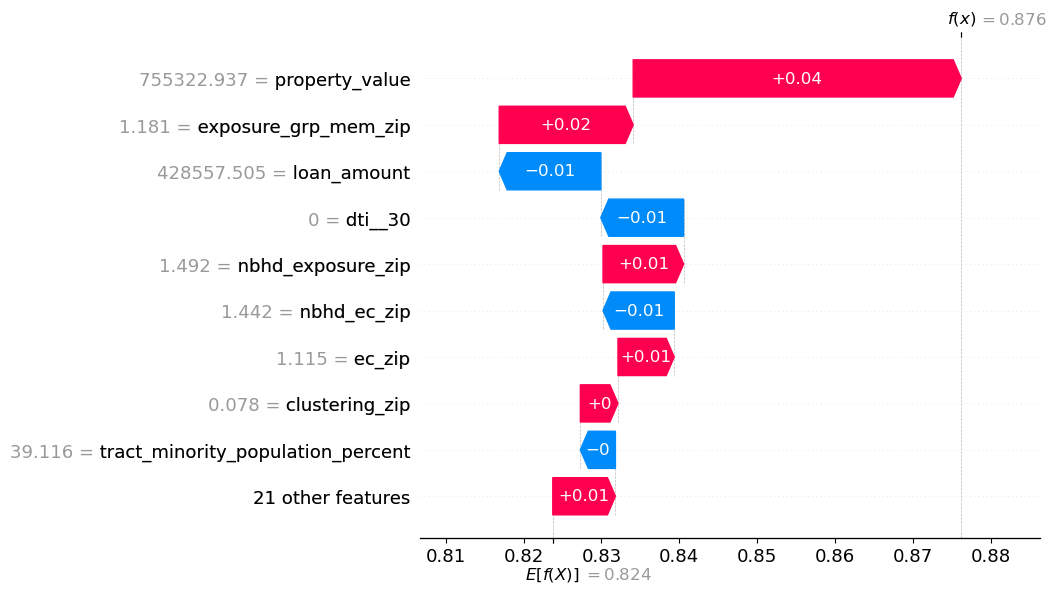

In [63]:
shap.plots.waterfall(test_shap_values[bottom_index[0]])
shap.plots.force(test_shap_values[bottom_index[0]])

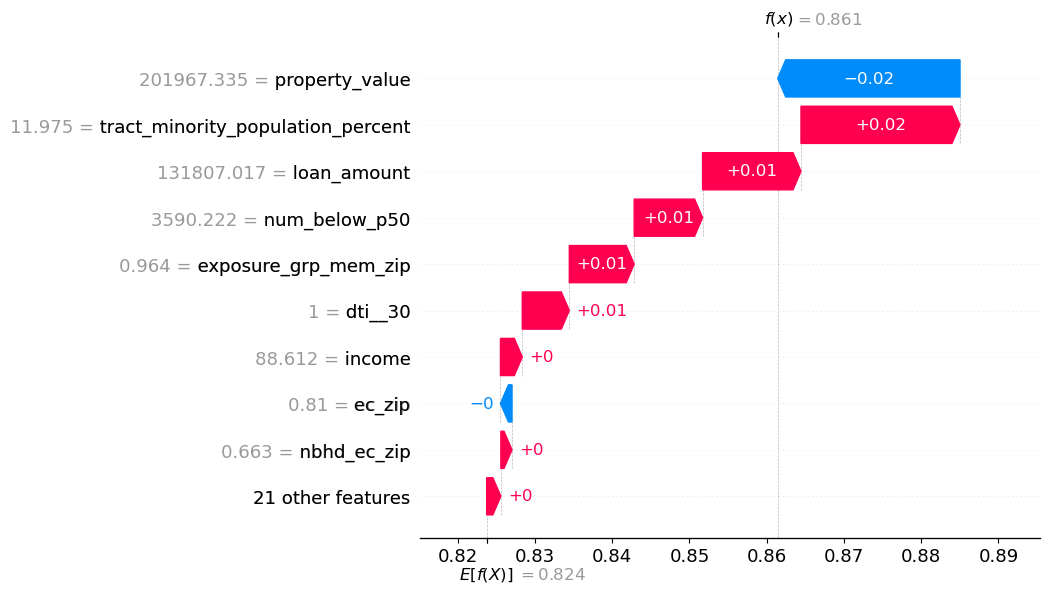

In [64]:
shap.plots.waterfall(test_shap_values[bottom_index[1]])
shap.plots.force(test_shap_values[bottom_index[1]])


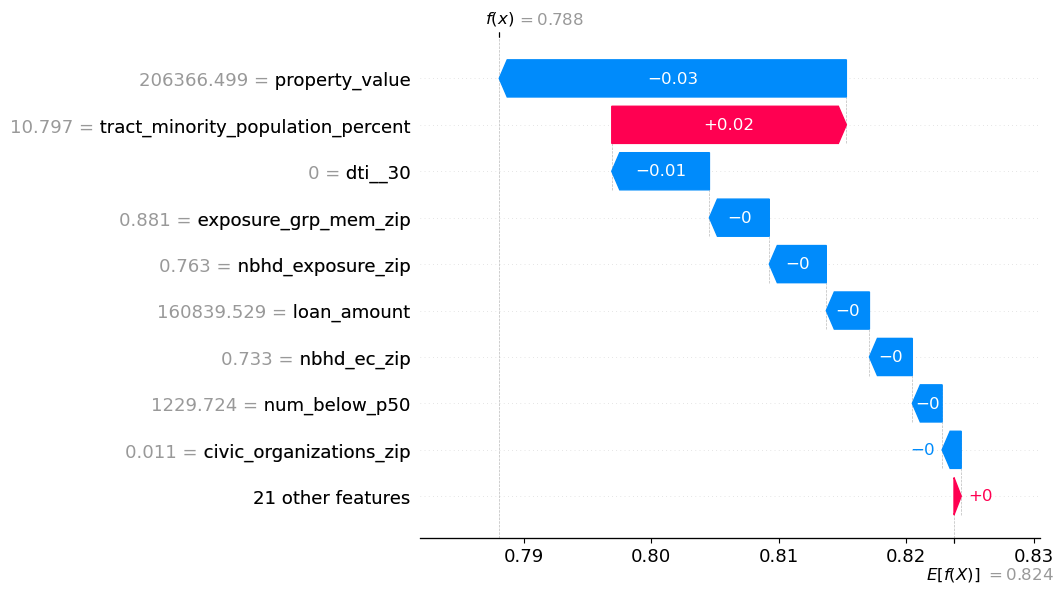

In [65]:
shap.plots.waterfall(test_shap_values[bottom_index[2]])
shap.plots.force(test_shap_values[bottom_index[2]])


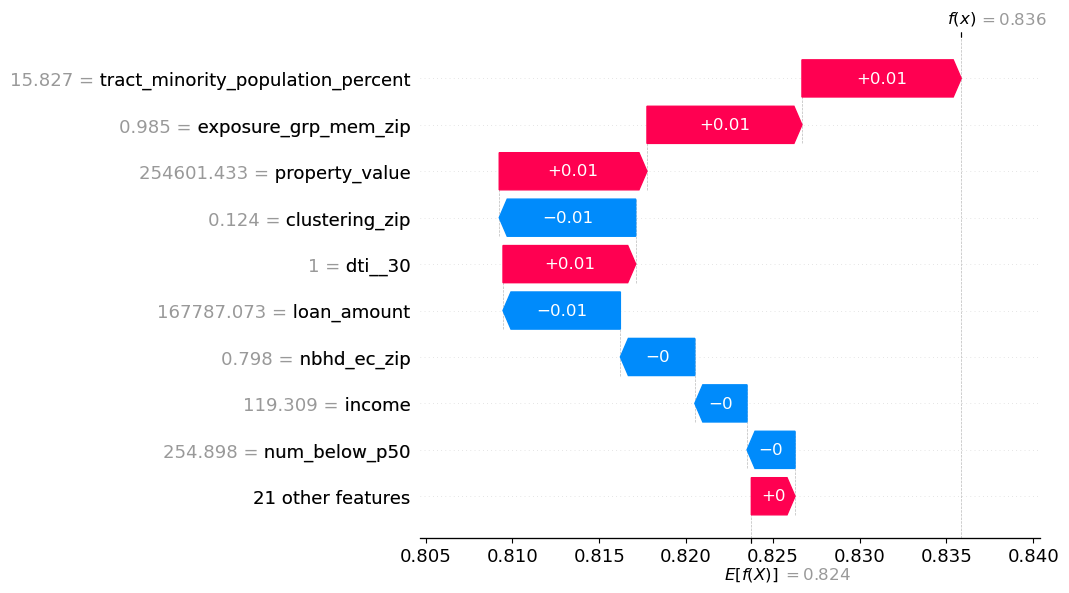

In [66]:
shap.plots.waterfall(test_shap_values[bottom_index[3]])
shap.plots.force(test_shap_values[bottom_index[3]])


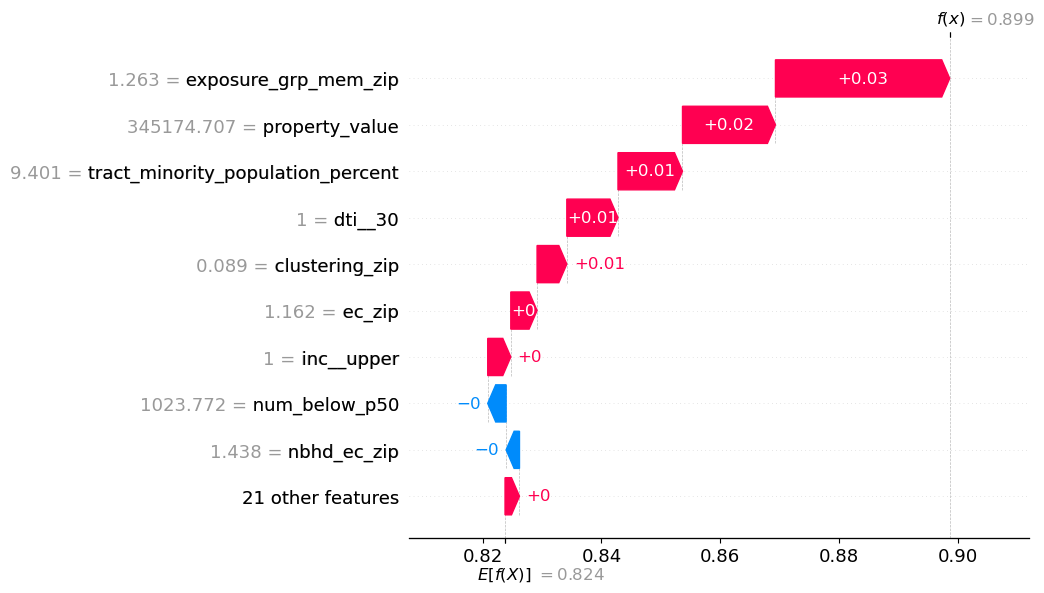

In [67]:
shap.plots.waterfall(test_shap_values[bottom_index[4]])
shap.plots.force(test_shap_values[bottom_index[4]])


### SHAP Summaries

 92%|==================  | 9139/9979 [00:11<00:01]       No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


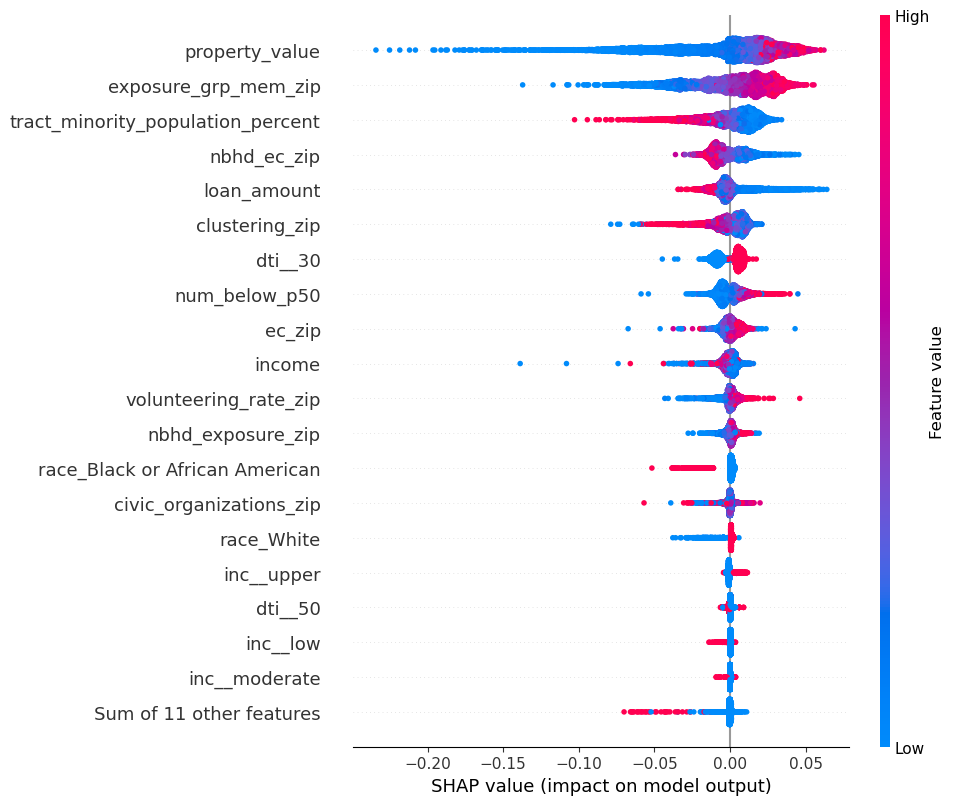

In [68]:
# Beeswarm
train_shap_values = explainer(X_train)
shap.plots.beeswarm(train_shap_values, max_display=20)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


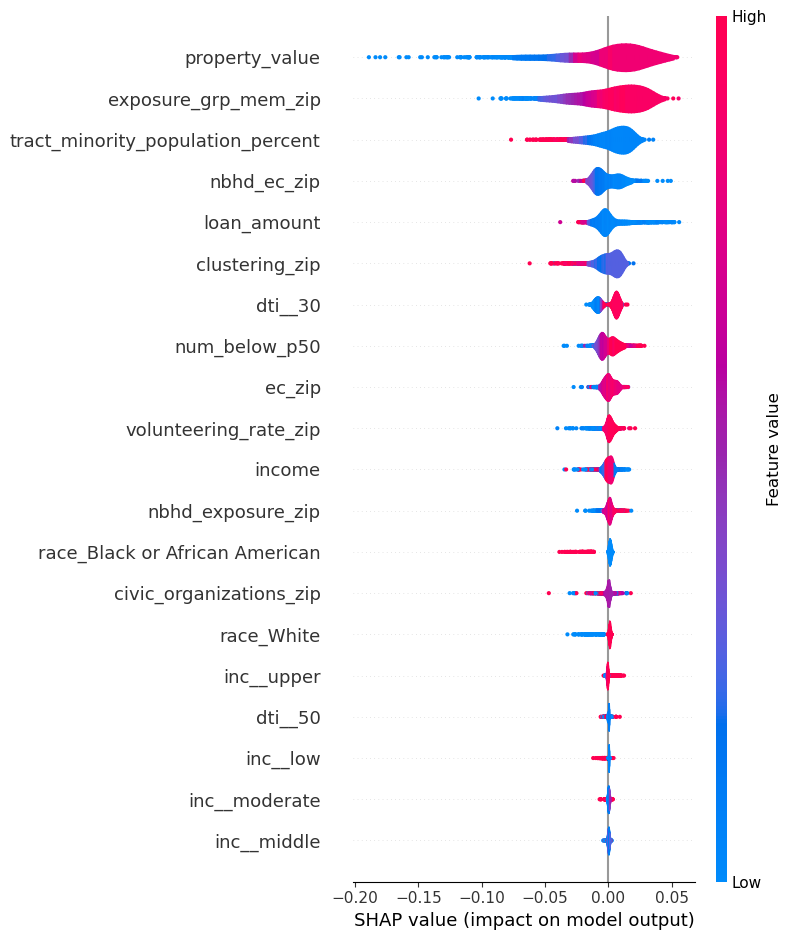

In [69]:
# Violin plot shows similar results with some segment colors blended together
shap.summary_plot(test_shap_values, plot_type="violin")


## 